# KNN 알고리즘
- breast_cancer 데이터를 이용한 실습2

In [27]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [47]:
breast_cancer_data = load_breast_cancer()
X_Data = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [29]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [30]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [31]:
X_Data.columns = breast_cancer_data.feature_names
X_Data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Data)
X_scaled = scaler.transform(X_Data)

X = pd.DataFrame(X_scaled)

X.columns = breast_cancer_data.feature_names
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42)

In [34]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [89]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [90]:
print(classifier.score(X_test,y_test))
#train 데이터와 test 데이터 결과 간 score, 높을수록 좋음

0.6851851851851852


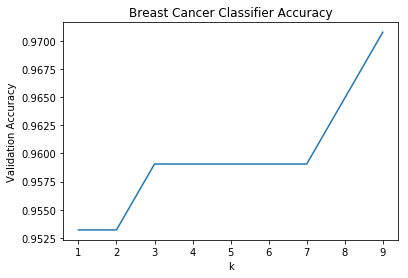

In [44]:
import matplotlib.pyplot as plt
k_list = range(1,10)
accuracies=[]
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train.values.ravel())
    accuracies.append(classifier.score(X_test,y_test.values.ravel()))
plt.plot(k_list,accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()


## (참고) Warning 이 계속 뜰때 아래 코드를 돌리면 안뜸

In [51]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X,y,cv=5,scoring ='accuracy')
print(scores)
print(scores.mean())

[0.96521739 0.94782609 0.98230088 0.95575221 0.98230088]
0.9666794921123509


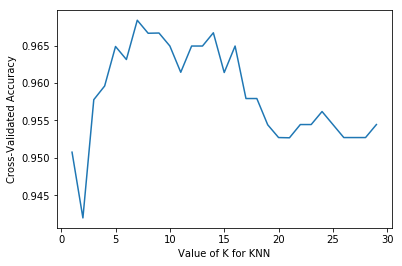

In [55]:
from sklearn import model_selection
k_range = range(1,30)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=model_selection.cross_val_score(knn,X,y,cv=5,scoring ='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

# 그래프 해석 : 계속 감소하기 시작하는 15와 20 사이(16쯤)의 K개수를 사용하는게 적절


# 나이브 베이즈(Naïve Bayes)
- 확률적 분류 기법
- 적용 
    - 스팸 필터링, 텍스트 분류
    - 네트워크 침입, 비정상행위 탐지
    - 의학 질병 진단

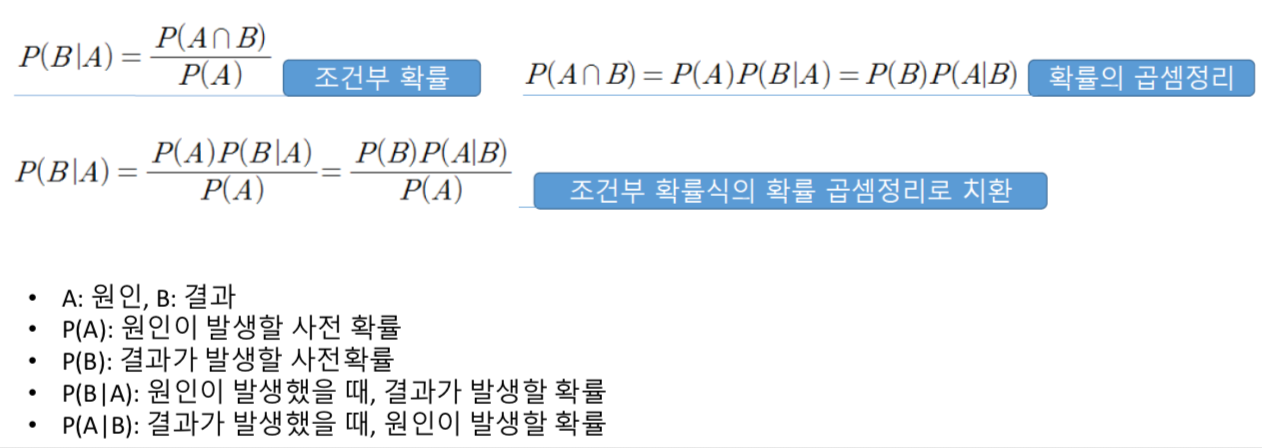

In [57]:
#예시
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()

clf.fit(features_train,labels_train)

pred = clf.predict(features_test)
accuracy= accuracy_score(pred,test)

print("score using accuracy : ",accuracy_score)

In [60]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
play_tennis = pd.read_csv("../Downloads/PlayTennis.csv")
play_tennis#.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [62]:
# 자동 인코딩, 알파벳 순으로 0부터 시작
number = LabelEncoder()
play_tennis['Outlook']=number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature']=number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity']=number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind']=number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis']=number.fit_transform(play_tennis['Play Tennis'])

print(play_tennis)

    Outlook  Temperature  Humidity  Wind  Play Tennis
0         2            1         0     1            0
1         2            1         0     0            0
2         0            1         0     1            1
3         1            2         0     1            1
4         1            0         1     1            1
5         1            0         1     0            0
6         0            0         1     0            1
7         2            2         0     1            0
8         2            0         1     1            1
9         1            2         1     1            1
10        2            2         1     0            1
11        0            2         0     0            1
12        0            1         1     1            1
13        1            2         0     0            0


In [66]:
features = ["Outlook","Temperature","Humidity","Wind"]
target = "Play Tennis"

X=play_tennis[features]
y=play_tennis[target]

print(X)
print(y)

    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int64


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42)

In [69]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [72]:
pred= model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print("accuracy : ",accuracy)

accuracy :  0.6


In [74]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
print(type(iris))

print('data shape : ', iris.data.shape)
print('iris target : ', iris.target_names)
print('iris features : ', iris.feature_names)

X = iris.data
print('type X : ',type(X))
print(X[:5])
y = iris.target
print('type y : ',type(y))
print(y[:5])

<class 'sklearn.utils.Bunch'>
data shape :  (150, 4)
iris target :  ['setosa' 'versicolor' 'virginica']
iris features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
type X :  <class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
type y :  <class 'numpy.ndarray'>
[0 0 0 0 0]


In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler =StandardScaler()
scaler.fit(X_train,y_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

print(X_train_scale)
print(X_test_scale)

[[ 0.5451645  -1.27558122  0.69683411  0.93091454]
 [-0.92770019  1.71226668 -1.27268356 -1.16938619]
 [ 1.52707429 -0.12640895  1.20328151  1.19345214]
 [ 0.66790322  0.1034255   0.97819377  0.79964575]
 [ 0.29968705 -0.3562434   0.52801831  0.27457056]
 [ 1.28159684  0.1034255   0.75310604  1.45598973]
 [-1.05043891  0.79292887 -1.27268356 -1.30065499]
 [ 0.66790322  0.33325996  0.86564991  1.45598973]
 [ 0.91338067 -0.12640895  0.35920251  0.27457056]
 [-0.43674529 -1.50541568  0.02157091 -0.11923582]
 [ 2.14076791 -0.12640895  1.59718504  1.19345214]
 [-0.43674529 -1.50541568 -0.03470103 -0.25050462]
 [-0.92770019  1.71226668 -1.04759582 -1.03811739]
 [-1.05043891 -1.73525013 -0.25978876 -0.25050462]
 [-0.31400657 -0.81591231  0.24665864  0.14330177]
 [ 1.03611939  0.1034255   1.03446571  1.58725852]
 [-1.54139381  0.79292887 -1.32895549 -1.16938619]
 [-0.06852912 -0.81591231  0.07784284  0.01203297]
 [ 0.79064195 -0.12640895  1.14700957  1.32472093]
 [-0.19126784 -0.3562434   0.24

In [81]:
#머신 러닝 모델 선택 - naive_bayes
gnb = GaussianNB()
gnb.fit(X_train_scale,y_train)
y_pred = gnb.predict(X_test_scale)

#성능 측정 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.91      0.95        11
          2       0.90      1.00      0.95         9

avg / total       0.97      0.97      0.97        30



In [83]:
from sklearn import datasets
wine = datasets.load_wine()

print("Features :", wine.feature_names)
print("Label :",wine.target_names)

Features : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Label : ['class_0' 'class_1' 'class_2']


In [85]:
X=wine.data
y=wine.target

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=1)


from sklearn.naive_bayes import GaussianNB

gnb =GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)


from sklearn import metrics

print("Accuray : ", metrics.accuracy_score(y_test,y_pred))

Accuray :  0.9814814814814815


In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb,X,y,cv=6,scoring ='accuracy')
print(scores)
print(scores.mean())

[0.9        1.         0.9        1.         0.96666667 1.        ]
0.9611111111111111


# SVM (Support Vector Machine)
- 분류 모델
- 하드마진 : 마진을 컴팩트하게, 선형적으로 구분이 될때
- 소프트마진 : 비선형
- 옵션
    - c : classification
    - kernel: 
        - Linear Kernel
        - Polynomial Kernel
        - RBF(Radial Basis Function) 예측

In [92]:
from sklearn import svm

In [93]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
slf.predict(x_test)
clf.score(x_Test,y_test)

In [95]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
training_points=[[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
labels=[1,1,1,0,0,0]
classifier.fit(training_points,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
print(classifier.predict([[3,2]]))

[1]


In [98]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score


iris = load_iris()
col1=0
col2=1

X=iris.data[:,:2]
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

#모델 정의
model = SVC()
#모델 학습
model.fit(X_train,y_train)
#모델 평가
score1 = model.score(X_train,y_train)
print(score1)

0.8


# SVM 실습
- SVC 모델
    - mglearn

In [100]:
#이렇게 모듈 설치할수 있음
#!pip install mglearn

import mglearn

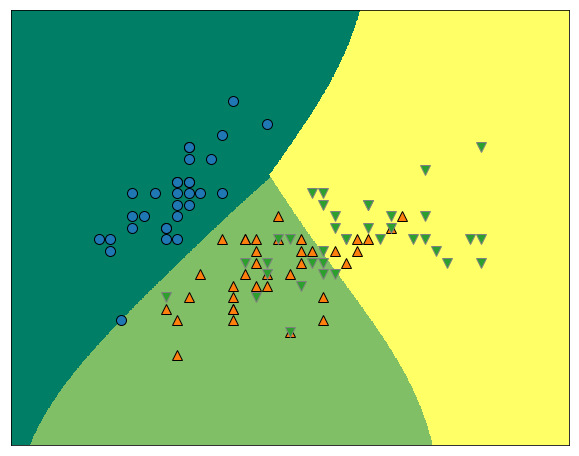

In [101]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm ='summer')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)


- C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정
    - 작을수록 많이 허용 하고,클수록 적게 허용

0.7904761904761904

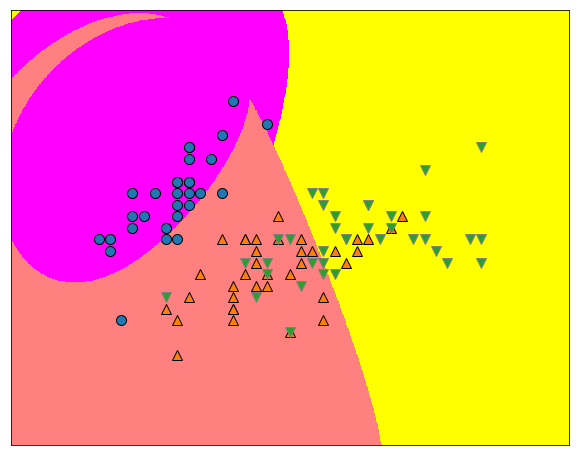

In [104]:
model =SVC(C=0.05)
model.fit(X_train,y_train)

score = model.score(X_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm='spring')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

0.8095238095238095

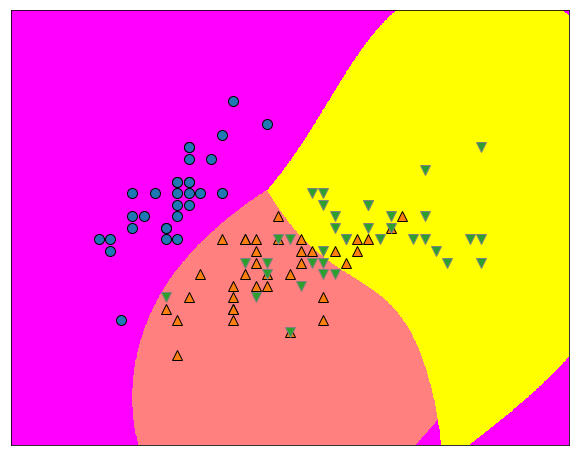

In [105]:
model =SVC(C=10)
model.fit(X_train,y_train)

score = model.score(X_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm='spring')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

0.8380952380952381

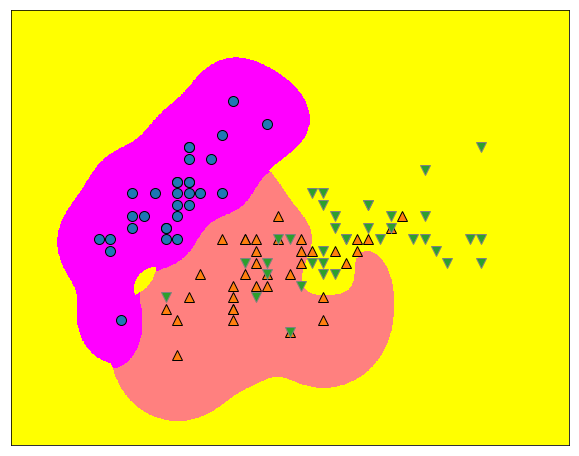

In [106]:
model =SVC(gamma=10)
model.fit(X_train,y_train)

score = model.score(X_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm='spring')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

0.9619047619047619

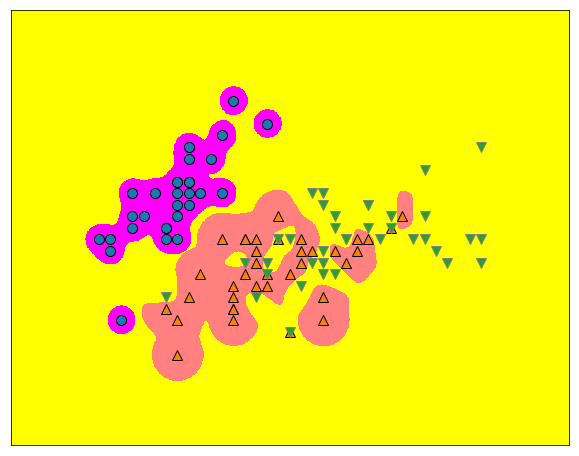

In [107]:
model =SVC(gamma=100)
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm='spring')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

0.8857142857142857

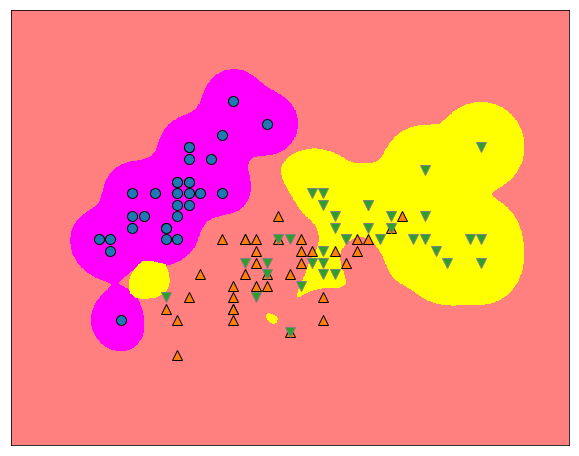

In [110]:
model =SVC(gamma=25)
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,X_train,cm='spring')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

[3.3        3.31082164 3.32164329 ... 8.67835671 8.68917836 8.7       ]


Text(0.5,1,'Kernel SVC - iris')

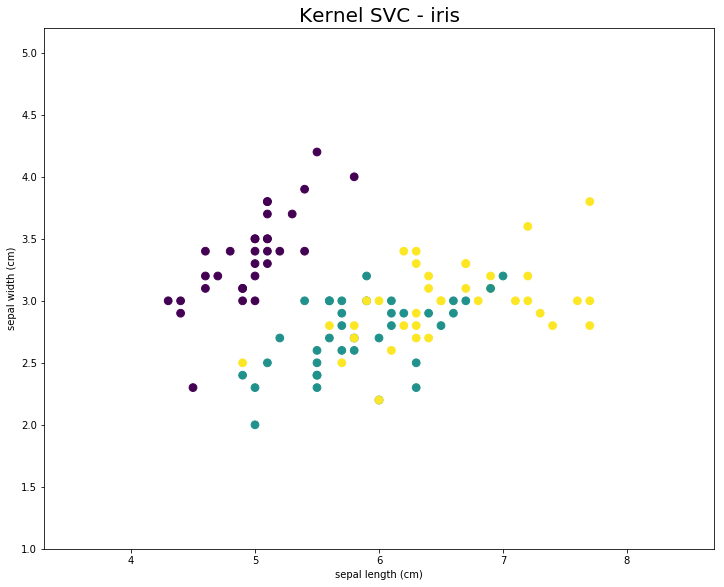

In [111]:
import matplotlib.pyplot as plt
import numpy as np

scale = 500
xmax= X_train[:,0].max()+1
xmin= X_train[:,0].min()-1
ymax= X_train[:,1].max()+1
ymin= X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1,data2 = np.meshgrid(xx,yy)

X_grid=np.c_[data1.ravel(),data1.ravel()]
print(data1.ravel())
pred_y=model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS=plt.imshow(pred_y.reshape(scale,scale),interpolation=None,
              origin='lower',extent=[xmin,xmax,ymin,ymax],
             alpha=0.3,cmap='gray_r')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title('Kernel SVC - iris',fontsize=20)

## SVM 실습
- make_moons 데이터
- kernel 옵션
    - 'linear'
    - 'rbf' 

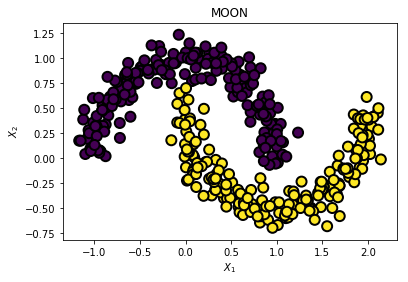

In [131]:
from sklearn.datasets import make_moons

plt.title("MOON")
X,y=make_moons(n_samples=400,noise=0.1,random_state=0)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,
           edgecolor='k',linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=100)

#'linear'
svm_clf=svm.SVC(kernel='linear',random_state=100)

scores = cross_val_score(svm_clf,X,y,cv=5)
print(scores)

print('linear 교차 검증 평균',scores.mean())
print(pd.DataFrame(cross_validate(svm_clf,X,y,cv=5)))

print()

#'rbf'
svm_clf=svm.SVC(kernel='rbf')

scores = cross_val_score(svm_clf,X,y,cv=5)
print(scores)

print('rbf 교차 검증 평균',scores.mean())
print(pd.DataFrame(cross_validate(svm_clf,X,y,cv=5)))

[0.85   0.8875 0.8375 0.8625 0.95  ]
linear 교차 검증 평균 0.8775000000000001
   fit_time  score_time  test_score  train_score
0  0.001872    0.000511      0.8500     0.896875
1  0.001772    0.000537      0.8875     0.875000
2  0.001400    0.000475      0.8375     0.887500
3  0.001383    0.000474      0.8625     0.878125
4  0.001470    0.000407      0.9500     0.868750

[0.9625 1.     0.975  0.9625 0.9875]
rbf 교차 검증 평균 0.9775
   fit_time  score_time  test_score  train_score
0  0.002157    0.000568      0.9625     0.981250
1  0.001315    0.000326      1.0000     0.971875
2  0.000793    0.000276      0.9750     0.978125
3  0.000722    0.000272      0.9625     0.978125
4  0.000767    0.000276      0.9875     0.987500


/Users/kangjinhee/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kangjinhee/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## SVM 실습
- breast_cancer 데이터
- kernel 옵션
    - 'linear'
    - 'rbf' 

In [121]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

x_Data = pd.DataFrame(breast_cancer_data.data)
y=pd.DataFrame(breast_cancer_data.target)

In [122]:
X_Data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [125]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf=svm.SVC(kernel='linear')

scores = cross_val_score(svm_clf,X_Data,y,cv=5)
print(scores)

print('교차검증 평균',scores.mean())
print(pd.DataFrame(cross_validate(svm_clf,X_Data,y,cv=5)))

[0.94782609 0.93043478 0.97345133 0.92035398 0.95575221]
교차검증 평균 0.9455636783378223
   fit_time  score_time  test_score  train_score
0  0.878410    0.000636    0.947826     0.971366
1  2.013341    0.000624    0.930435     0.975771
2  1.100127    0.000629    0.973451     0.956140
3  0.623316    0.000610    0.920354     0.975877
4  1.103989    0.000622    0.955752     0.971491


/Users/kangjinhee/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [126]:
svm_clf=svm.SVC(kernel='rbf')

scores = cross_val_score(svm_clf,X_Data,y,cv=5)
print(scores)

print('교차검증 평균',scores.mean())
print(pd.DataFrame(cross_validate(svm_clf,X_Data,y,cv=5)))

[0.62608696 0.62608696 0.62831858 0.62831858 0.62831858]
교차검증 평균 0.6274259330511736
   fit_time  score_time  test_score  train_score
0  0.013096    0.002389    0.626087          1.0
1  0.012112    0.002446    0.626087          1.0
2  0.012568    0.002233    0.628319          1.0
3  0.012183    0.002227    0.628319          1.0
4  0.013487    0.002230    0.628319          1.0


/Users/kangjinhee/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


First column name | Second column name
--- | ---
Row 1, Col 1 | Row 1, Col 2
Row 2, Col 1 | Row 2, Col 2

>One level of indentation